In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing data

data=pd.read_csv('car data.csv')

In [3]:
# data overview

data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# Features-Categorical/Numerical

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [12]:
# checking % of vehicle under different categoical features:

for i in ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']:
    #print(i)
    print(data[i].value_counts(1)*100)
    print()

Petrol    79.401993
Diesel    19.933555
CNG        0.664452
Name: Fuel_Type, dtype: float64

Dealer        64.784053
Individual    35.215947
Name: Seller_Type, dtype: float64

Manual       86.710963
Automatic    13.289037
Name: Transmission, dtype: float64

0    96.345515
1     3.322259
3     0.332226
Name: Owner, dtype: float64



In [13]:
import scipy.stats as stats

# to see if categories like Fuel type, Seller Type, Transmission have any impact on Selling_price- we can apply:

#ttest_ind,anova based on number of sub categories:

# Fuel type vs Selling Price:

stats.f_oneway(data[data['Fuel_Type']=='Petrol']['Selling_Price'],data[data['Fuel_Type']=='Diesel']['Selling_Price'],data[data['Fuel_Type']=='CNG']['Selling_Price'])

F_onewayResult(statistic=65.41489426788685, pvalue=2.8039251267809206e-24)

Conclusion-Selling price of vehicle is dependent on fuel type- we can apply posthoc analysis to see if any two of the three prices are same


In [14]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

pairwise_tukeyhsd(data['Selling_Price'],data['Fuel_Type']).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
CNG,Diesel,7.1785,0.0508,-0.0198,14.3768,False
CNG,Petrol,0.1642,0.9,-6.9466,7.275,False
Diesel,Petrol,-7.0143,0.001,-8.4604,-5.5683,True


At alpha=0.05 i.e. we conclude that prices for Diesel and Petrol cars are significantly different from each other.


In [5]:
#Checking null values

data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
#checking no of rows,columns

data.shape

(301, 9)

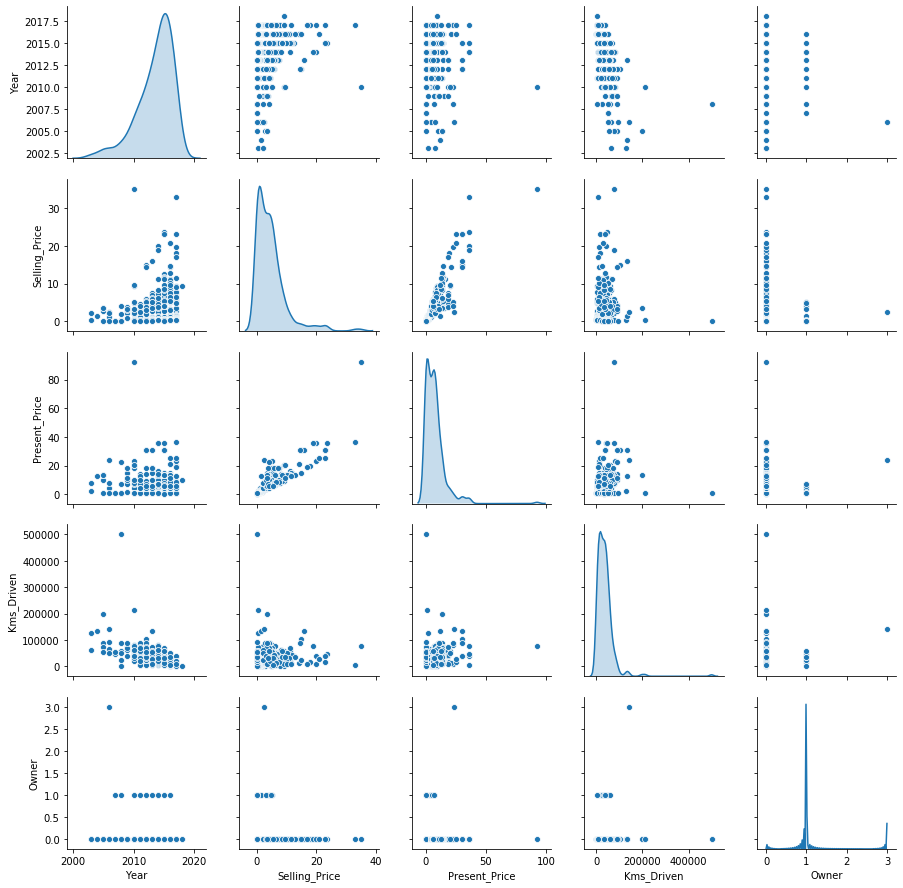

In [7]:
# checking data distribution
# relationship amongst numerical features and individual feature with target

sns.pairplot(data,diag_kind='kde')
plt.show()

In [9]:
# dropping feature-Car Name as this has no role in predicting prices

data=data.drop(columns='Car_Name')

In [18]:
# creating dummies for categorical features

data=pd.get_dummies(data,drop_first=True)

In [12]:
# importing libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [14]:
# importing libraries

from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics

In [32]:
# splitting data into features and target i.e. X and y respectively
# further splitting X and y in train and test

X=data.drop('Selling_Price',axis=1)
y=data['Selling_Price']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)



lr=LinearRegression()

# cross- validation for scores to get average accuracy when k=10

scoresdt = cross_val_score(lr, Xtrain, ytrain, cv=10)


In [34]:
# mean of 10 individual accuracies

scoresdt.mean()

0.8395655868673794

In [24]:
lr.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
# since cross validation accuracy is 84% approx- we can fit the model

# calculate train score

metrics.r2_score(ytrain,lr.predict(Xtrain))

0.8891242736539984

In [27]:
# calculate test score

metrics.r2_score(ytest,lr.predict(Xtest))

0.8436773164234637

# Since train score is slightly higher than test score- trying to regularize using ridge to reduce overfitting

In [28]:
# Regularizing using Ridge

In [29]:
from sklearn.linear_model import Ridge

In [43]:
X=data.drop('Selling_Price',axis=1)
y=data['Selling_Price']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
r=Ridge(alpha=2)
scoresdt = cross_val_score(lr, Xtrain, ytrain, cv=10)

scoresdt.mean()

0.8395655868673794

In [44]:
r.fit(Xtrain,ytrain)

Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [45]:
# r2 score for train

metrics.r2_score(ytrain,r.predict(Xtrain))


0.8886832884502095

In [46]:
# r2 score for test

metrics.r2_score(ytest,r.predict(Xtest))

0.843472306660194